# Анализ уровеня преступности в Чикаго


### Аннотация
В исследовании решается задача выявления трендов в данных.

### Введение

Имеются данные по преступлениям зафиксированным в Чикаго за 2019 год.<br/>
Определение условий в которых было совершено то или иное преступление необходимо, для принятия релевантных мер по снижению уровня преступности


Название поля      | Пояснение
:-------------|:-----------
`ID`        | Номер записи
`Case Number` | Идентификационный номер дела
`Date`         | Дата и время фиксации данных о перступлени
`IUCR`  | four digit codes that law enforcement agencies use to classify criminal incidents when taking and filing individual reports
`Primary Type`  | Тип преступления (31 вид)
`Description`        | Более подробная классификация преступления (292 вида)
`Location Description` | Классификация места преступления (123 вида)
`Arrest`         | Было ли задежание
`District `  | Номер округа
`Ward`  | Номер избирательного округа (еще один формат деления городов в США)
`Community area`        | Номер района
`FBI Code` | Номер полицейского учатка
`Year`         | Год
`Updated on`  | Дата последнего обновления данных 
`Latitude`        | Широта
`Longitude` | Долгота
`Location` | Координаты 


### Подготовка данных к анализу 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
crimes = pd.read_csv('crimes_chicago.csv')
crimes.head(4)

,ID,Case Number,Date,IUCR,Primary Type,Description,Location Description,Arrest,District,Ward,Community Area,FBI Code,Year,Updated On,Latitude,Longitude,Location
0,24368,JC103046,01/03/2019 02:37:00 PM,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,2,3.0,38.0,01A,2019,03/19/2019 04:11:22 PM,41.802909,-87.621048,"(41.802908524, -87.62104831)"
1,24369,JC103046,01/03/2019 02:37:00 PM,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,2,3.0,38.0,01A,2019,03/19/2019 04:11:22 PM,41.802909,-87.621048,"(41.802908524, -87.62104831)"
2,24370,JC105864,01/05/2019 04:23:00 PM,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,14,2.0,24.0,01A,2019,03/19/2019 04:11:22 PM,41.904789,-87.661560,"(41.904788891, -87.66155984)"
3,24371,JC106397,01/06/2019 12:10:00 AM,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,7,17.0,67.0,01A,2019,07/16/2019 04:17:29 PM,41.764065,-87.659515,"(41.764064647, -87.659514616)"


Посмотрим типы данных в столбцах

In [3]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214753 entries, 0 to 214752
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    214753 non-null  int64  
 1   Case Number           214753 non-null  object 
 2   Date                  214753 non-null  object 
 3   IUCR                  214753 non-null  object 
 4   Primary Type          214753 non-null  object 
 5   Description           214753 non-null  object 
 6   Location Description  213969 non-null  object 
 7   Arrest                214753 non-null  bool   
 8   District              214753 non-null  int64  
 9   Ward                  214745 non-null  float64
 10  Community Area        214751 non-null  float64
 11  FBI Code              214753 non-null  object 
 12  Year                  214753 non-null  int64  
 13  Updated On            214753 non-null  object 
 14  Latitude              213669 non-null  float64
 15  

Поменяем формат столбца Date на удобный для взаимодействия datetime64

In [4]:
crimes['Date'] = pd.to_datetime(crimes['Date'], format='%m/%d/%Y %I:%M:%S %p', errors = 'raise')

In [5]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214753 entries, 0 to 214752
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    214753 non-null  int64         
 1   Case Number           214753 non-null  object        
 2   Date                  214753 non-null  datetime64[ns]
 3   IUCR                  214753 non-null  object        
 4   Primary Type          214753 non-null  object        
 5   Description           214753 non-null  object        
 6   Location Description  213969 non-null  object        
 7   Arrest                214753 non-null  bool          
 8   District              214753 non-null  int64         
 9   Ward                  214745 non-null  float64       
 10  Community Area        214751 non-null  float64       
 11  FBI Code              214753 non-null  object        
 12  Year                  214753 non-null  int64         
 13 

У нас отсутствуют данные о: 
```
1) классификации места преступления (Location Description) для 784 преступлений
2) номере избирательного округа (Ward) для 8 преступлений
3) номере районе для 2 преступлений
4) кординатах для 1084 преступлений
```

# Разведочный анализ данных

### Популярные преступления а также районы их совершения

Составим рейтинг преступлений по частоте их совершения

In [6]:
MostCri = crimes.groupby('Primary Type')[['ID']].count().sort_values(by='ID', ascending=False)
MostCri

,ID
Primary Type,
THEFT,51230
BATTERY,41615
CRIMINAL DAMAGE,22469
ASSAULT,17392
DECEPTIVE PRACTICE,14280
OTHER OFFENSE,13965
NARCOTICS,11634
BURGLARY,7886
MOTOR VEHICLE THEFT,7407


Посмотрим какие преступления чаще всего приводят к аррестам

In [7]:
crimes.query('Arrest').groupby('Primary Type')[['ID']].count().sort_values(by='ID', ascending=False)


,ID
Primary Type,
NARCOTICS,11623
BATTERY,8507
THEFT,4949
WEAPONS VIOLATION,3565
CRIMINAL TRESPASS,3168
ASSAULT,3116
OTHER OFFENSE,3078
CRIMINAL DAMAGE,1398
INTERFERENCE WITH PUBLIC OFFICER,1277


Теперь составим рейтинг районов по числу преступлений в них

In [8]:
crimes.groupby('Community Area')[['ID']].count().sort_values(by='ID', ascending=False)

,ID
Community Area,
25.0,12224
8.0,10337
32.0,8786
28.0,7603
29.0,7325
...,...
12.0,384
74.0,368
47.0,316


### Зависимость числа и вида преступлений от времени суток и дня недели

Построим тепловую карту колличества преступлений по часам и дням недели

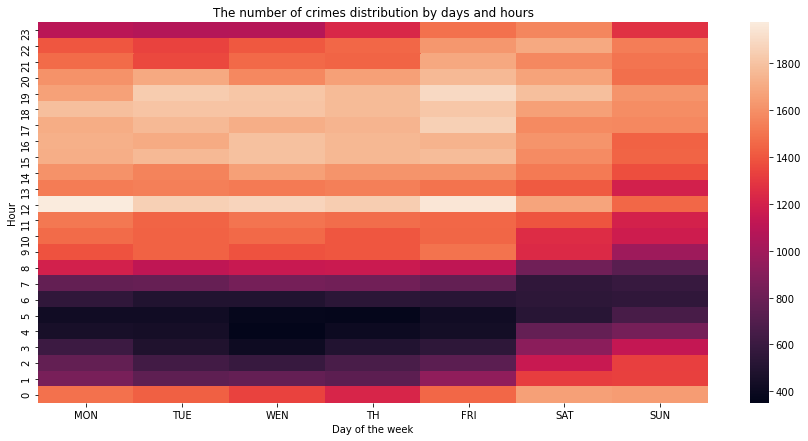

In [9]:
CrimeTime = crimes.pivot_table('ID', columns = crimes['Date'].dt.dayofweek, index = crimes['Date'].dt.hour, aggfunc=('count'))

colreplacements = { 0 : 'MON', 1 : 'TUE', 2 : 'WEN', 3 : 'TH', 4 : 'FRI', 5 : 'SAT', 6 : 'SUN'}
CrimeTime.columns = CrimeTime.columns.map(colreplacements)
CrimeTime.sort_index(level=0, ascending=False, inplace=True)

plt.figure(figsize=(15, 7))
sns.heatmap(data=CrimeTime)
plt.ylabel('Hour')
plt.xlabel('Day of the week')
plt.title('The number of crimes distribution by days and hours');

Большинство преступлений совершается в обед в рабочие дни. Наименее преступными оказывается время с 1 ночи до 7 часов утра в рабочие дни и с 3 ночи до 8 утра. Видимо большинство преступников предпочитает поздно ложиться и поздно вставать в выходные дни, аналогично людям, не связанным с криминалом.

Построим почасовой график соотношения числа преступлений между собой

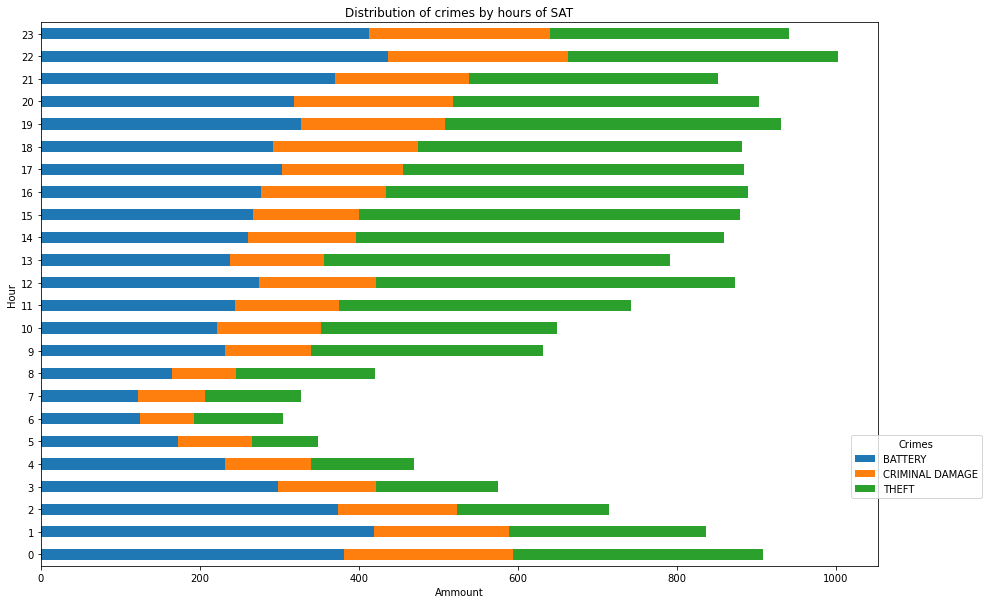

In [10]:
day = 5          # день недели (0, 6)
n_crimes = 3     #колличество видов преступлений для отображения на графике по убыванию частоты

#Таблицу MostCri я делал выше. Тут использую её для получения списка видов преступлений
CrimeTime2 = crimes[ (crimes['Date'].dt.dayofweek == day) 
                 & (crimes['Primary Type'].isin(MostCri.reset_index()['Primary Type'][:n_crimes]))]



fig, ax = plt.subplots(1, figsize=(15, 10)) 

pd.crosstab(columns=CrimeTime2['Primary Type'], index=CrimeTime2['Date'].dt.hour).plot(kind='barh', ax=ax, stacked=True)

plt.xlabel('Ammount')
plt.ylabel('Hour')
plt.legend(title='Crimes',
           bbox_to_anchor=(1.13, 0.25))

plt.title(f'Distribution of crimes by hours of {colreplacements[day]}');

In [11]:
# Датасет с наиболее частыми преступлениями
crimesTop = crimes[crimes['Primary Type'].isin(MostCri[:6].reset_index()['Primary Type'])]

Text(0.5, 1.0, 'Distr. of crimes Sun.')

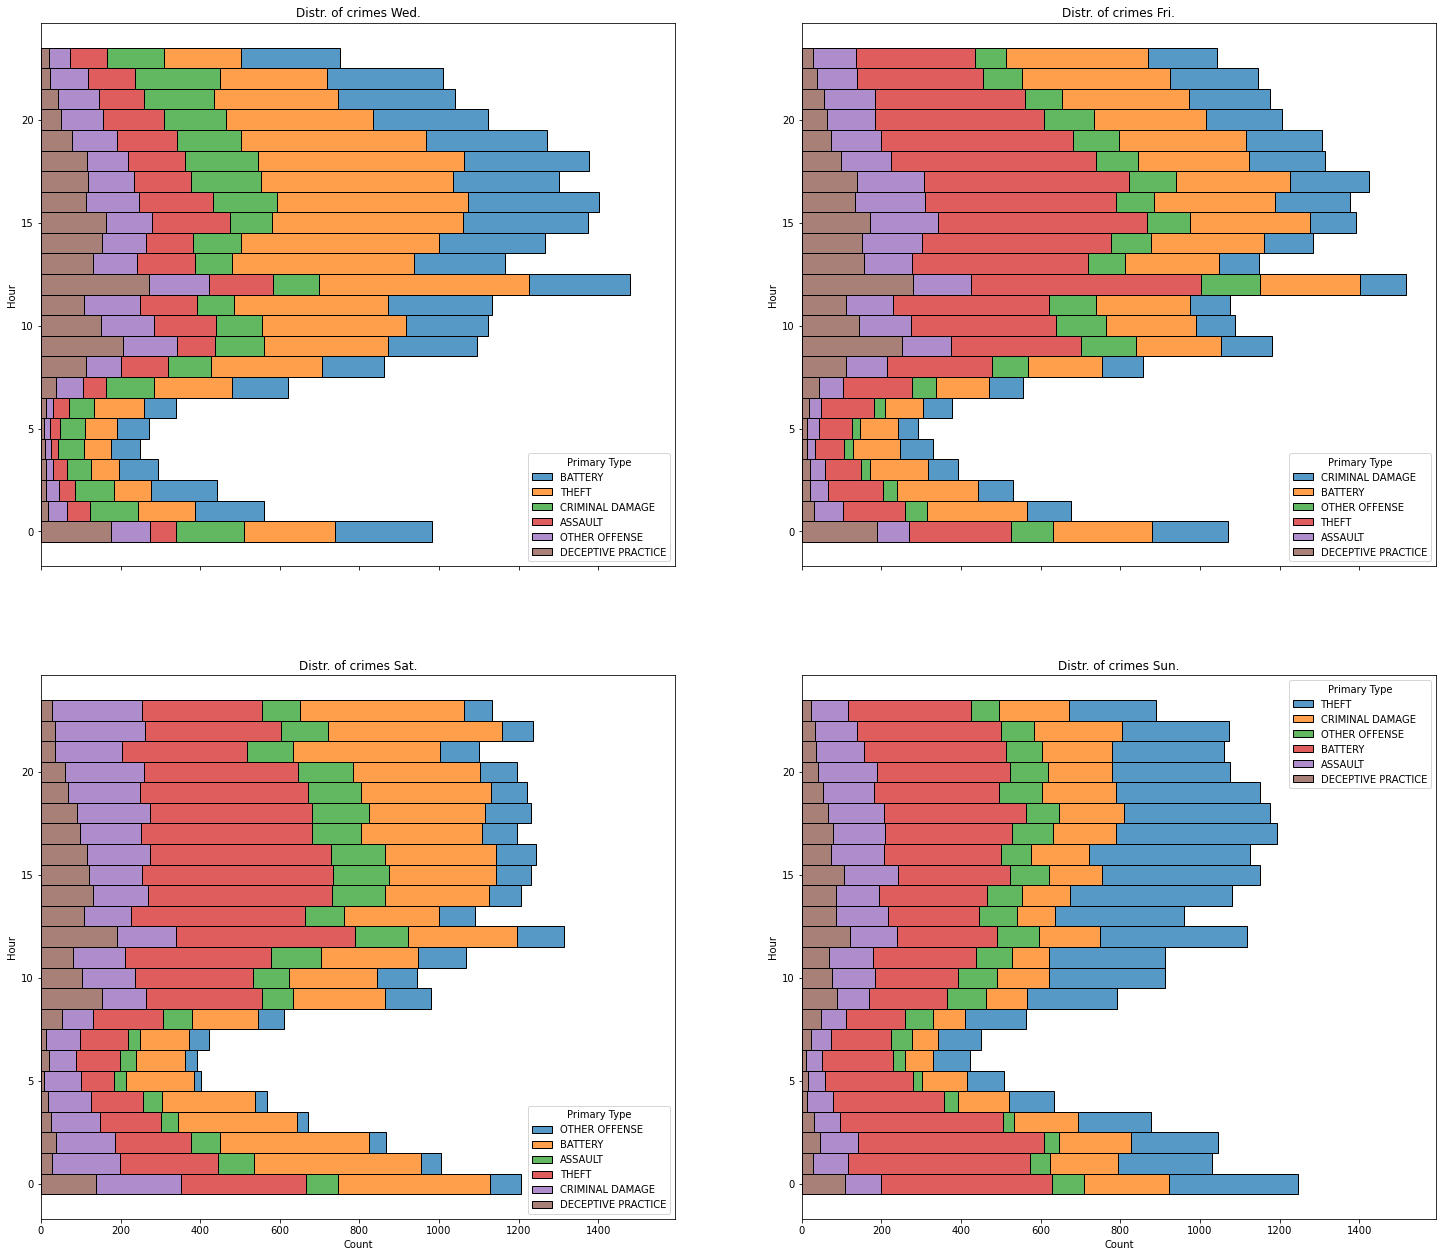

In [12]:
crimesTopWed = crimesTop[crimesTop['Date'].dt.dayofweek == 2]
crimesTopFri = crimesTop[crimesTop['Date'].dt.dayofweek == 4]
crimesTopSat = crimesTop[crimesTop['Date'].dt.dayofweek == 5]
crimesTopSun = crimesTop[crimesTop['Date'].dt.dayofweek == 6]

f, axes = plt.subplots(2, 2, figsize=(25, 22), sharex=True)

sns.histplot(data=crimesTopWed, y=crimes['Date'].dt.hour, hue='Primary Type', discrete=True, multiple="stack", ax=axes[0, 0])
sns.histplot(data=crimesTopFri, y=crimes['Date'].dt.hour, hue='Primary Type', discrete=True, multiple="stack", ax=axes[0, 1])
sns.histplot(data=crimesTopSat, y=crimes['Date'].dt.hour, hue='Primary Type', discrete=True, multiple="stack", ax=axes[1, 0])
sns.histplot(data=crimesTopSun, y=crimes['Date'].dt.hour, hue='Primary Type', discrete=True, multiple="stack", ax=axes[1, 1])



axes[0, 0].set_ylabel('Hour')
axes[0, 1].set_ylabel('Hour')
axes[1, 0].set_ylabel('Hour')
axes[1, 1].set_ylabel('Hour')

axes[0, 0].set_title('Distr. of crimes Wed.')
axes[0, 1].set_title('Distr. of crimes Fri.')
axes[1, 0].set_title('Distr. of crimes Sat.')
axes[1, 1].set_title('Distr. of crimes Sun.')

В полночь субботы и особенно воскресенья наблюдается большое число преступлений. Для воскресенья это значения является пиковым за весь день.

Посчитаем колличество преступлений для каждого дня недели

In [13]:
CrimeDay = crimes.groupby(crimes['Date'].dt.dayofweek)[['ID']].count().sort_values(by='ID', ascending=False)
CrimeDay

,ID
Date,
4,32086
5,31528
0,30796
3,30302
1,30193
2,30177
6,29671


Вывод: больше всего преступлений совершается в пятницу и субботу

### Месяцы преступлений

Выведем распределение преступлений по месяцам, чтобы определить, в какие периоды возрастает преступная активность

In [14]:
crimes['Date'].dt.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

Нам предоставлены данные с января по октябрь

In [15]:
crimes.groupby(crimes['Date'].dt.month).size()

Date
1     19453
2     18233
3     20224
4     20782
5     23435
6     23264
7     24530
8     23922
9     21927
10    18983
dtype: int64

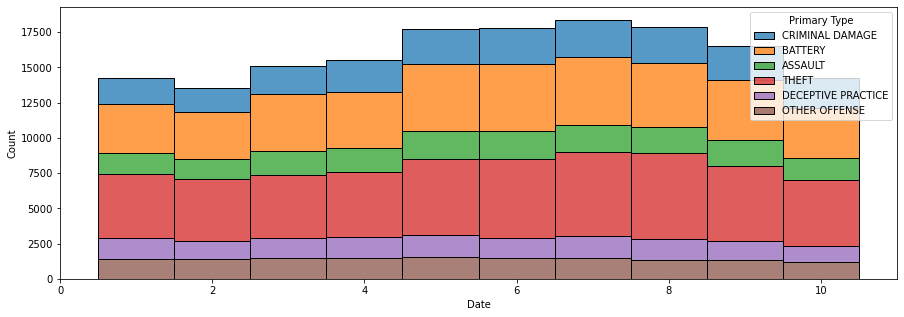

In [16]:
plt.figure(figsize=(15, 5))
sns.histplot(x=crimesTop['Date'].dt.month, data=crimesTop, hue='Primary Type', discrete=1, multiple="stack")
plt.show()

Заметно, что наибольшее число преступлений приходится Май, Июнь, Июль (пиковое значение), Август. Можно предположить, что в это время многие люди уезжают в отпуск, что делает их имущество желанной целью для воров.

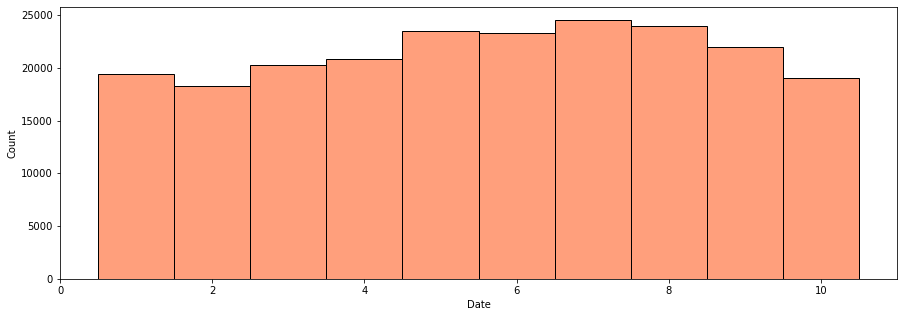

In [25]:
crimesM2 = crimes.query('`Primary Type` == "THEFT"')
plt.figure(figsize=(15, 5))
sns.histplot(x=crimesTop['Date'].dt.month, data=crimesM2, discrete=1, color='coral')
plt.show()

In [22]:
crimes.query('`Primary Type` == "HOMICIDE"')

ID                      431
Case Number             431
Date                    431
IUCR                    431
Primary Type            431
Description             431
Location Description    431
Arrest                  431
District                431
Ward                    431
Community Area          431
FBI Code                431
Year                    431
Updated On              431
Latitude                430
Longitude               430
Location                430
dtype: int64

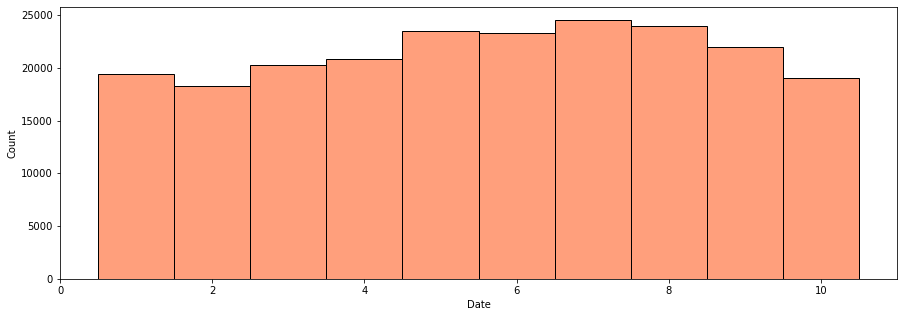

In [23]:
crimesM2 = crimes.query('`Primary Type` == "HOMICIDE"')
plt.figure(figsize=(15, 5))
sns.histplot(x=crimesTop['Date'].dt.month, data=crimes.query('`Primary Type` == "HOMICIDE"'), discrete=1, color='coral')
plt.show()

Построив график по числу случаев воровства мы подтвердили нашу гипотезу.

#### Координаты

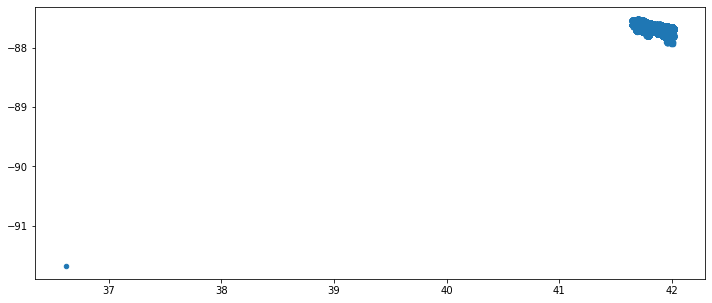

In [18]:
fig, ax = plt.subplots(1, figsize=(12, 5))

crimes.plot(x='Latitude', y='Longitude', kind='scatter', ax=ax)

plt.title('');
plt.xlabel('')
plt.ylabel('');

Из-за одного отклоняющегося значения график распределения слишком растянут. Отрисуем его без этого значения.

In [19]:
crimes.query('Latitude < 37')

,ID,Case Number,Date,IUCR,Primary Type,Description,Location Description,Arrest,District,Ward,Community Area,FBI Code,Year,Updated On,Latitude,Longitude,Location
117060,11732417,JC318144,2019-06-23 09:03:00,0486,BATTERY,DOMESTIC BATTERY SIMPLE,OTHER,False,11,27.0,23.0,08B,2019,06/30/2019 04:13:20 PM,36.619446,-91.686566,"(36.619446395, -91.686565684)"


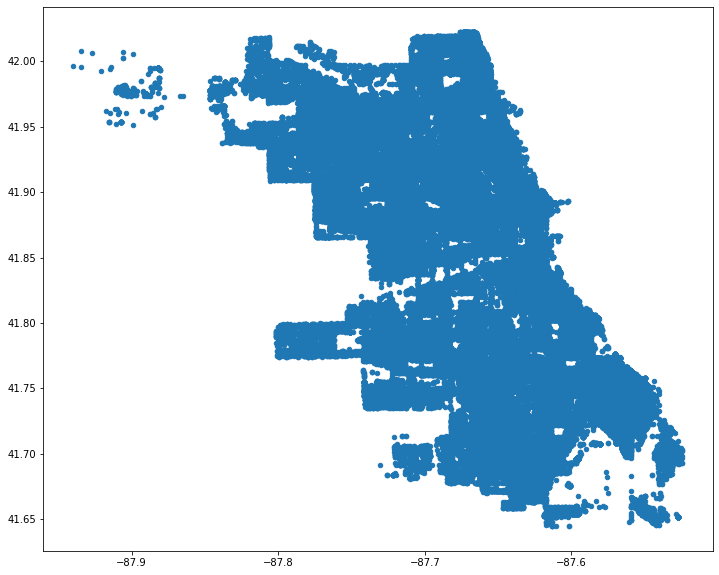

In [20]:
fig, ax = plt.subplots(1, figsize=(12, 10))

crimes.query('Latitude > 37').plot(y='Latitude', x='Longitude', kind='scatter', ax=ax)

plt.title('');
plt.xlabel('')
plt.ylabel('');

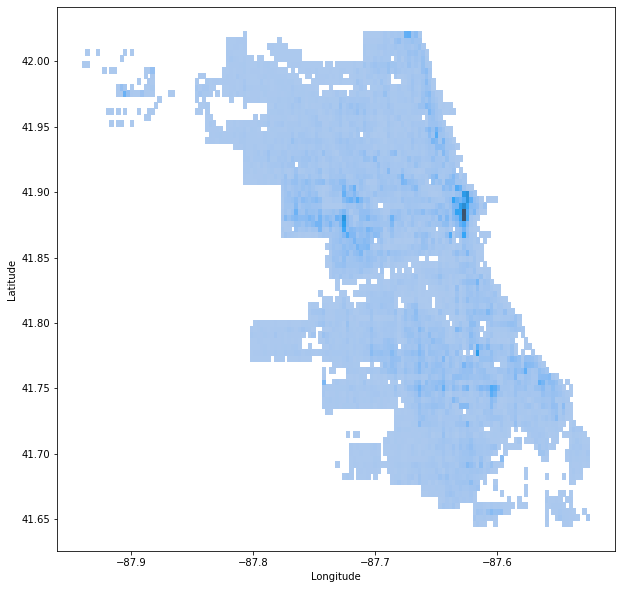

In [21]:
crimesMap = crimes.query('Latitude > 37')

plt.figure(figsize=(10, 10))
sns.histplot(data=crimesMap, y='Latitude', x="Longitude")

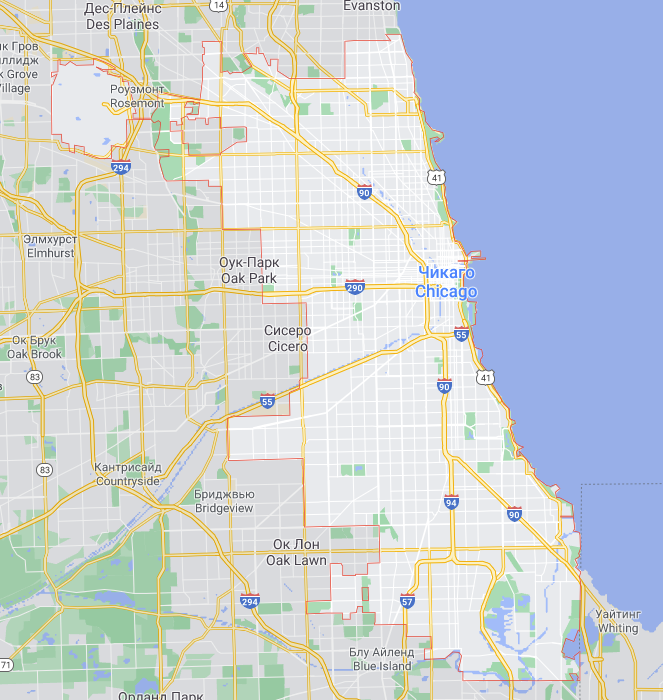

При соотнесении карты и координат видно неравномерное распределение преступлений на Северо - Западе (Международный аэропорт О'хэр) и Юго - Востоке (район Хэджуиш). <br/> Имеет смысл полагать, что Хэджуиш - наименее криминальный жилой район Чикаго

Судя по данным, наибольшая концентрация преступлений в Чикаго приходится на Грант Парк.

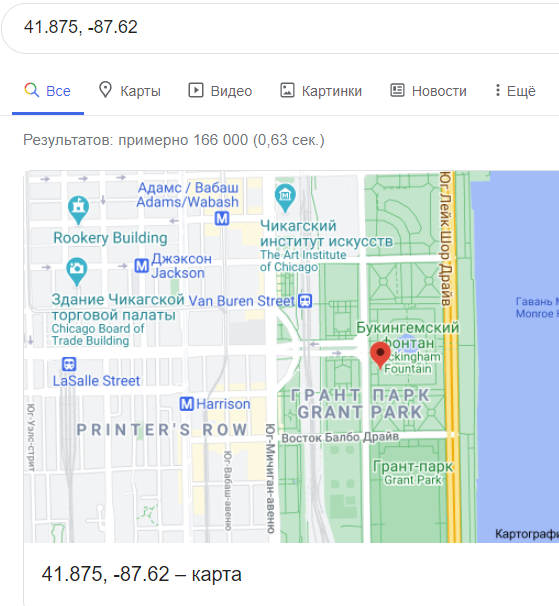

# Выводы

### 1 
Большинство преступлений совершается в обед в рабочие дни. Наименее преступными оказывается время с 1 ночи до 7 часов утра в рабочие дни и с 3 ночи до 8 утра. <br/>
Средний преступник в выходные дни совершает противозаконные действия позже, чем в рабочие.

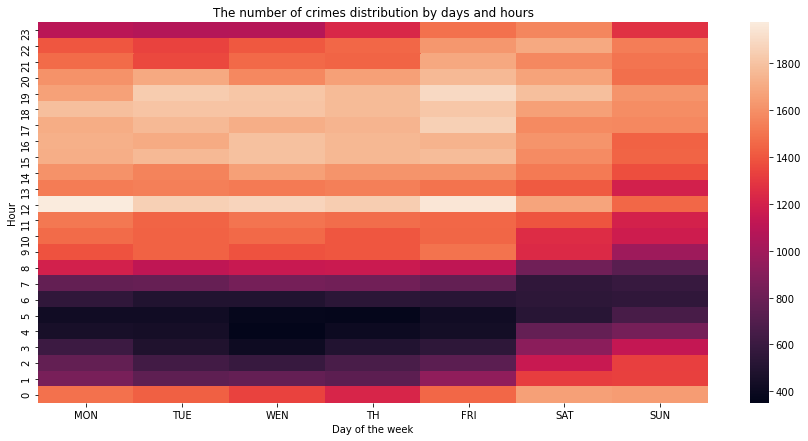

In [22]:
plt.figure(figsize=(15, 7))
sns.heatmap(data=CrimeTime)
plt.ylabel('Hour')
plt.xlabel('Day of the week')
plt.title('The number of crimes distribution by days and hours');

### 2
В выходные ночью совершается куда большее число преступлений, чем в это же время, но в рабочие дни. <br/>
Для воскресенья пик преступности и вовсе приходится на полночь.

Text(0.5, 1.0, 'Distr. of crimes Sun.')

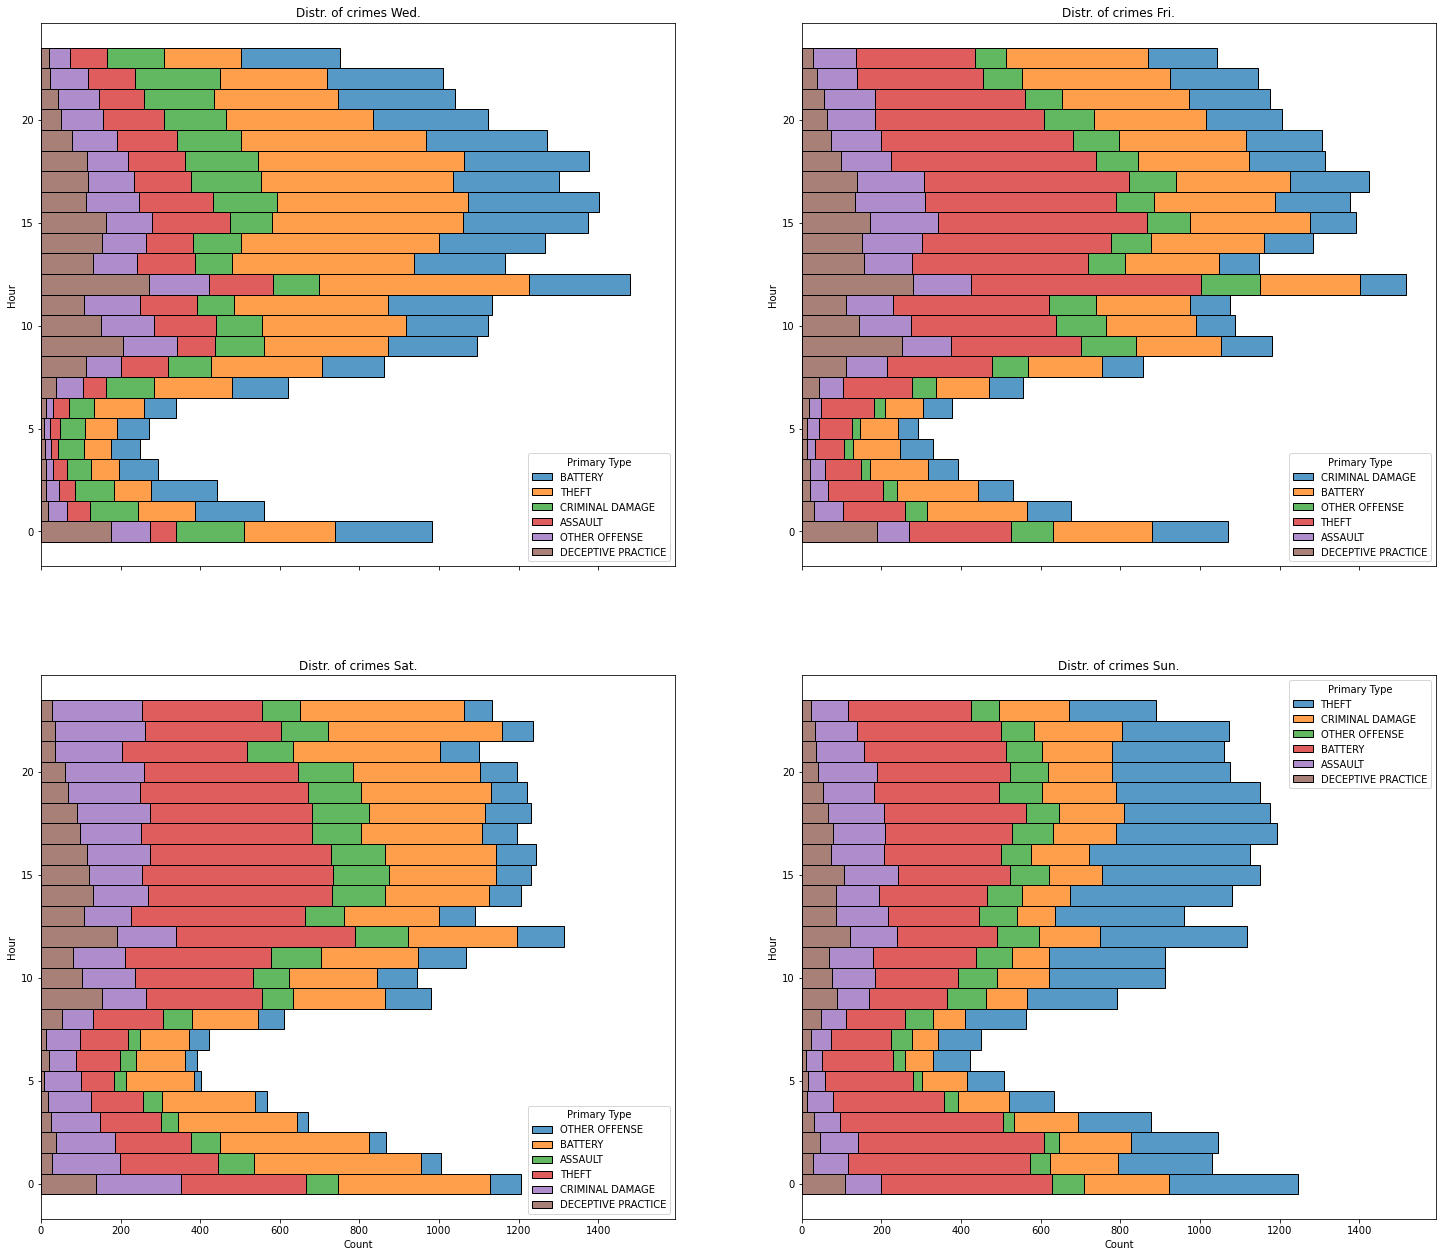

In [23]:
crimesTopWed = crimesTop[crimesTop['Date'].dt.dayofweek == 2]
crimesTopFri = crimesTop[crimesTop['Date'].dt.dayofweek == 4]
crimesTopSat = crimesTop[crimesTop['Date'].dt.dayofweek == 5]
crimesTopSun = crimesTop[crimesTop['Date'].dt.dayofweek == 6]

f, axes = plt.subplots(2, 2, figsize=(25, 22), sharex=True)

sns.histplot(data=crimesTopWed, y=crimes['Date'].dt.hour, hue='Primary Type', discrete=True, multiple="stack", ax=axes[0, 0])
sns.histplot(data=crimesTopFri, y=crimes['Date'].dt.hour, hue='Primary Type', discrete=True, multiple="stack", ax=axes[0, 1])
sns.histplot(data=crimesTopSat, y=crimes['Date'].dt.hour, hue='Primary Type', discrete=True, multiple="stack", ax=axes[1, 0])
sns.histplot(data=crimesTopSun, y=crimes['Date'].dt.hour, hue='Primary Type', discrete=True, multiple="stack", ax=axes[1, 1])



axes[0, 0].set_ylabel('Hour')
axes[0, 1].set_ylabel('Hour')
axes[1, 0].set_ylabel('Hour')
axes[1, 1].set_ylabel('Hour')

axes[0, 0].set_title('Distr. of crimes Wed.')
axes[0, 1].set_title('Distr. of crimes Fri.')
axes[1, 0].set_title('Distr. of crimes Sat.')
axes[1, 1].set_title('Distr. of crimes Sun.')

### 3
Наибольшее число преступлений приходится Май, Июнь, Июль (пиковое значение), Август. Это связано с сезоном отпусков и людей, и, как следствие, ростом случаев краж в оставленных домах и квартирах.

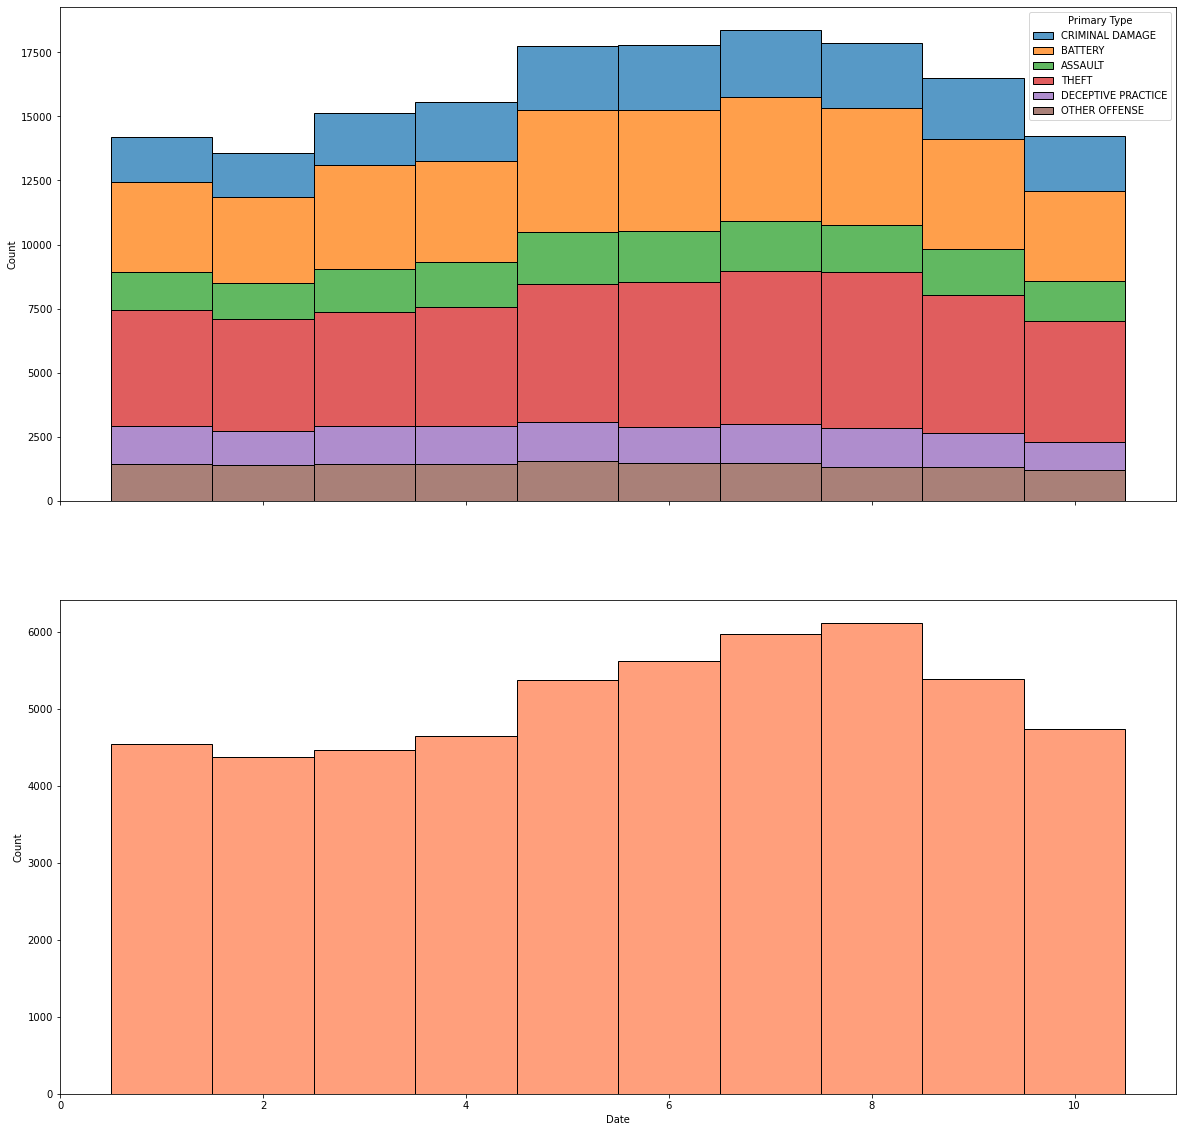

In [25]:
f, axes = plt.subplots(2, 1, figsize=(20, 20), sharex=True)

sns.histplot(x=crimesTop['Date'].dt.month, data=crimesTop, hue='Primary Type', discrete=1, multiple="stack", ax=axes[0])
sns.histplot(x=crimesM2['Date'].dt.month, data=crimesM2, discrete=1, color='coral', ax=axes[1])

### 4
Наиболее криминальный район Чикаго в районе Грант Парка. Наиболее спокойный - Хэджуиш

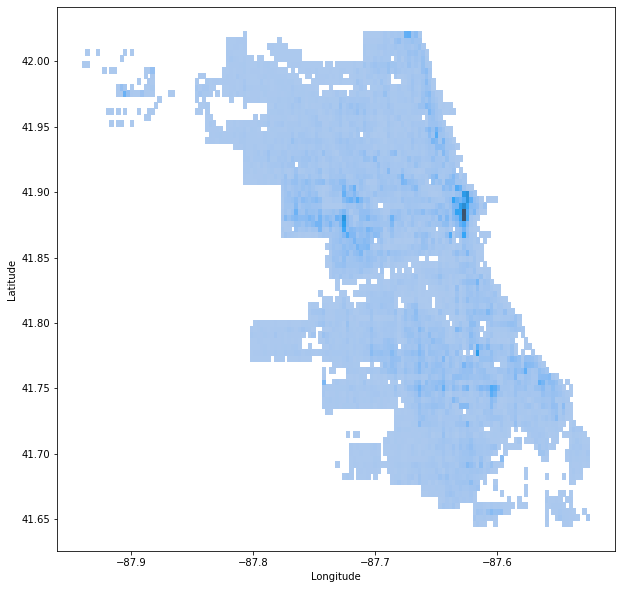

In [26]:
plt.figure(figsize=(10, 10))
sns.histplot(data=crimesMap, y='Latitude', x="Longitude")